In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
! pip install -q ..

In [1]:
import mouse_gait_analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from skimage import draw

from mouse_gait_analysis.io import *
from mouse_gait_analysis.utils import *
from mouse_gait_analysis.plots import *

In [4]:
# data_folder = Path("/shared/thea/trial-analysis/")
data_folder = Path("/home/andretelfer/shared/curated/thea/trial-analysis/")

video_analysis = VideoAnalysis(
    data_folder / "AccA19.mp4",
    data_folder / "AccA19DLC_resnet50_A19allMar17shuffle1_1030000.h5")

video_analysis.keypoints = filter_likelihood(video_analysis.keypoints, 0.8)
video_analysis.keypoints = filter_distance_traveled(video_analysis.keypoints, 10, 1)
keypoints = video_analysis.keypoints
keypoints

scorer    DLC_resnet50_A19allMar17shuffle1_1030000                         \
bodyparts                                     nose                          
coords                                           x           y likelihood   
0                                              NaN         NaN        NaN   
1                                       482.288300  111.082977   0.999975   
2                                       482.418396  111.148376   0.999986   
3                                       482.326294  111.309563   0.999989   
4                                       482.049133  111.482872   0.999984   
...                                            ...         ...        ...   
65941                                   976.271729  279.264252   0.999474   
65942                                   975.938049  279.080078   0.999180   
65943                                   975.209351  279.159668   0.998662   
65944                                   975.024292  279.338348   0.998043   
65945                                   975.150513  279.051880   0.997842   

scorer                                                                \
bodyparts       chest                           tailbase               
coords              x           y likelihood           x           y   
0                 NaN         NaN        NaN         NaN         NaN   
1          453.149506  117.363686   0.999358  346.435364  154.132401   
2          453.434021  117.140411   0.999586  346.795563  154.428558   
3          454.203491  117.101204   0.999775  347.659210  156.610367   
4          454.416992  117.147064   0.999723  348.634155  157.425400   
...               ...         ...        ...         ...         ...   
65941      958.020874  283.877411   0.999419  885.815247  282.101593   
65942      957.738403  283.906464   0.999339  885.804260  282.081085   
65943      957.169678  283.879120   0.999398  885.639709  282.078064   
65944      957.124084  283.807922   0.999388  885.683960  282.079620   
65945      957.271667  283.686493   0.999351  885.567383  282.101990   

scorer                               ...                                       \
bodyparts            left_front_paw  ...  left_toes left_back_paw               
coords    likelihood              x  ... likelihood             x           y   
0                NaN            NaN  ...        NaN           NaN         NaN   
1           0.999697            NaN  ...   0.956542    370.639282  160.197144   
2           0.999790     448.873840  ...   0.986609    371.824341  160.758530   
3           0.999905     449.756073  ...   0.988410    372.729370  164.785263   
4           0.999921     411.459930  ...   0.987647    373.770172  165.279495   
...              ...            ...  ...        ...           ...         ...   
65941       1.000000     969.093201  ...   0.999732    934.540039  295.510284   
65942       1.000000     968.578979  ...   0.999656    934.427917  295.453217   
65943       1.000000     969.773376  ...   0.999564    934.370605  295.346771   
65944       1.000000     969.664429  ...   0.999545    934.363770  295.390198   
65945       1.000000     969.607849  ...   0.999576    934.306152  295.420258   

scorer                                                                  \
bodyparts             right_toes                        right_back_paw   
coords    likelihood           x           y likelihood              x   
0                NaN         NaN         NaN        NaN            NaN   
1           0.981711  383.311798   99.737534   0.997145     371.689758   
2           0.989717  378.036224  100.462219   0.999101     368.240448   
3           0.996991  376.584106  101.477165   0.999729     369.561310   
4           0.994988  373.729553  103.296265   0.999705     365.553375   
...              ...         ...         ...        ...            ...   
65941       0.999999  947.110657  238.978867   0.999989     922.942627   
65942       0.999999  947.008423  239

In [5]:
video = Path(video_analysis.video).parts[-1]

registration_points = pd.read_csv(data_folder / "registration_points.csv")
registration_points['video'] = registration_points.video.apply(lambda x: Path(x).parts[-1])
points = registration_points.groupby('video').get_group(video)[['y', 'x']].values
w, h = 500, 500

target = [[0,0], [w,0], [w,h], [0,h]]
target = np.array(target)
transformer = PerspectiveTransformer()
transformer.register(points, target)
transformer.apply(video_analysis.keypoints)
reader = VideoReader(video_analysis.video, transforms=[transformer])

FileNotFoundError: [Errno 2] No such file or directory: '/home/andretelfer/shared/curated/thea/trial-analysis/registration_points.csv'

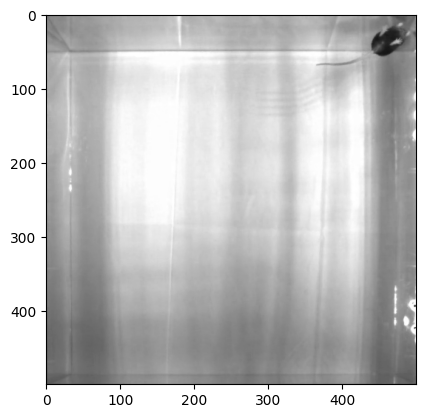

In [10]:
reader = VideoReader(video_analysis.video)
frame = reader[20000]
frame = transformer.apply(frame)
plt.imshow(frame)

In [98]:
pd.Series([0,1,2,4,8,16]).diff().shift(-1)

0    1.0
1    1.0
2    2.0
3    4.0
4    8.0
5    NaN
dtype: float64

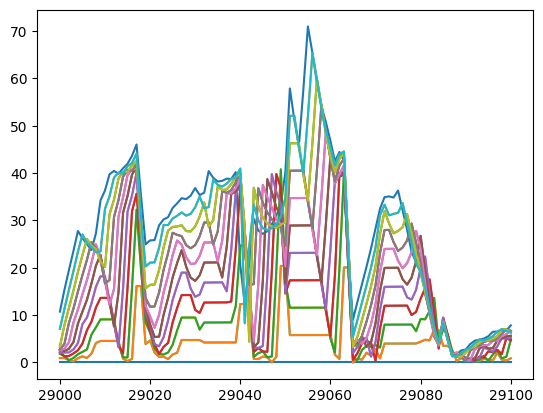

In [305]:
start = 29000
duration = 100
end = start + duration

bodypart = 'left_back_paw'
bodypart = 'left_toes'
data_folder = Path("/shared/thea/trial-analysis/")

video_analysis = VideoAnalysis(
    data_folder / "AccA19.mp4",
    data_folder / "AccA19DLC_resnet50_A19allMar17shuffle1_1030000.h5")

video_analysis.keypoints = filter_likelihood(video_analysis.keypoints, 0.6)
video_analysis.keypoints = filter_distance_traveled(video_analysis.keypoints, 10, 1)
keypoints = transformer.apply(video_analysis.keypoints)

bodypart_df = keypoints.xs(bodypart, axis=1, level='bodyparts').droplevel(0, axis=1)
# bodypart_df = bodypart_df.loc[start:end]
# plt.scatter(bodypart_df.x, bodypart_df.y)
# plt.plot(bodypart_df.x, bodypart_df.y)
# plt.show()

d = 10
for i in range(-d, d):
# for i in range(1,d):
    deltas = bodypart_df.diff(i)
    if i > 0:
        deltas = deltas.shift(-i)
        
    distance = np.sqrt(deltas.x**2 + deltas.y**2) #/ abs(i)
    plt.plot(distance.loc[start:end])

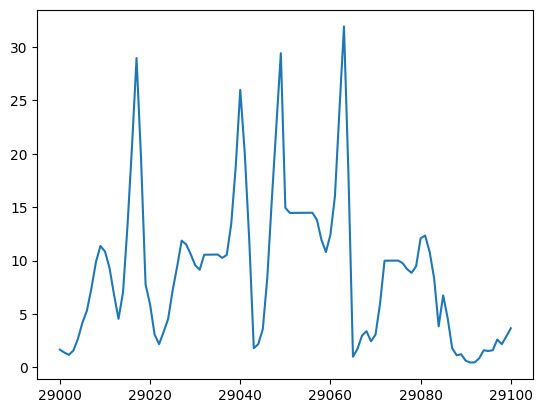

In [307]:
distances = []
distance_threshold = 10

d = 5
for i in range(-d, d):
# for i in range(d):
    deltas = bodypart_df.diff(i)
    if i > 0:
        deltas = deltas.shift(-i)
    distance = np.sqrt(deltas.x**2 + deltas.y**2)
    # distance = distance > distance_threshold
    distances.append(distance)
    
distances = sum(distances) / len(distances)
plt.plot(distances.loc[start:end])

/usr/local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


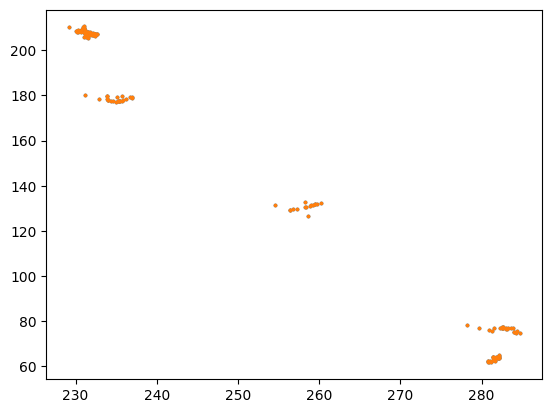

In [509]:
start = 31000
duration = 200
end = start + duration

# bodypart = 'left_back_paw'
bodypart = 'left_toes'
data_folder = Path("/shared/thea/trial-analysis/")

video_analysis = VideoAnalysis(
    data_folder / "AccA19.mp4",
    data_folder / "AccA19DLC_resnet50_A19allMar17shuffle1_1030000.h5")

video_analysis.keypoints = filter_likelihood(video_analysis.keypoints, 0.6)
video_analysis.keypoints = filter_distance_traveled(video_analysis.keypoints, 10, 1)
keypoints = transformer.apply(video_analysis.keypoints)
bodypart_df = keypoints.xs(bodypart, axis=1, level='bodyparts').droplevel(0, axis=1)

distances = []
distance_threshold = 1.3
d = 5
for i in range(1, d):
    deltas = bodypart_df.diff(i).shift(-i)
    distance = np.log(np.sqrt(deltas.x**2 + deltas.y**2))
    distances.append(distance)
    
distances = sum(distances) / len(distances)
distance_forward = distances < distance_threshold

distances = []
for i in range(-d, 0):
    deltas = bodypart_df.diff(i)
    distance = np.log(np.sqrt(deltas.x**2 + deltas.y**2))
    distances.append(distance)
    
distances = sum(distances) / len(distances)
distance_backwards = distances < distance_threshold
phase = distance_forward | distance_backwards

points = bodypart_df[phase].loc[start:end]
plt.scatter(points.x, points.y, s=3)

points = bodypart_df[~phase].loc[start:end]
plt.scatter(points.x, points.y, s=3)

In [414]:
step_segment.episode

31000    2310
31001    2310
31002    2310
31003    2310
31004    2310
         ... 
31196    2324
31197    2324
31198    2324
31199    2324
31200    2324
Name: episode, Length: 201, dtype: object

In [409]:
episode_df

,state,episode
31195,swing,2376
31196,swing,2376
31197,swing,2376
31198,swing,2376
31199,swing,2376
31200,swing,2376


In [508]:
step_df = pd.DataFrame(index=distance.index, columns=['state', 'episode'])
step_df.state = phase.apply(lambda x: 'swing' if x else 'stance')
episode = 0
last = None
segment_start = 0
for idx in tqdm(step_df.index):
    current = step_df.loc[idx].state
    if current != last:
        step_df.loc[segment_start:idx, 'episode'] = episode
        episode += 1
        segment_start = idx
        last = current

step_df.loc[segment_start:idx, 'episode'] = episode

# Collapse small episodes
min_episode_size = 3
for episode in tqdm(sorted(step_df.episode.unique())):
    index = step_df[step_df.episode == episode].iloc[0].name
    if index-1 not in step_df.index:
        continue

    previous = step_df.loc[index-1]

    # Collapse small episodes
    if (step_df.episode == episode).sum() < min_episode_size:
        step_df.loc[step_df.episode == episode, 'episode'] = previous.episode
        step_df.loc[step_df.episode == episode, 'state'] = previous.state
        
    # Collapse side by side episodes of the same state
    if step_df.loc[index, 'state'] == previous.state:
        step_df.loc[step_df.episode == episode, 'episode'] = previous.episode

# Renumber episodes
episode_renumbering = {o:n for n,o in enumerate(sorted(step_df.episode.unique()))}
step_df.episode = step_df.episode.apply(lambda x: episode_renumbering[x])

plt.figure(figsize=(20,20))
plt.imshow(reader[end])
step_segment = step_df.loc[start:end]

for episode in step_segment.episode.unique():
    episode_df = step_segment[step_segment.episode == episode]

    for bodypart in ['left_back_paw']:
        bodypart_df = keypoints.xs(bodypart, axis=1, level='bodyparts').droplevel(0, axis=1)
        bodypart_df = bodypart_df.loc[start:end]
        bodypart_df = bodypart_df.loc[episode_df.index]
        plt.scatter(bodypart_df.x, bodypart_df.y)

AttributeError: 'numpy.float64' object has no attribute 'index'

In [501]:
bodypart_df = keypoints.xs(bodypart, axis=1, level='bodyparts').droplevel(0, axis=1)
episode_df = pd.DataFrame(columns=['stride_length', 'duration', 'state', 'start', 'end'], index=sorted(step_df.episode.unique()))

for episode, group in step_df.groupby('episode'):
    group = group.dropna()

    start_index = group.iloc[0].name
    end_index = group.iloc[-1].name

    deltas = bodypart_df.loc[[start_index,end_index]].diff().iloc[1]
    distance = np.sqrt(deltas.x**2 + deltas.y**2)

    episode_df.loc[episode, 'state'] = group.iloc[0].state
    episode_df.loc[episode, 'stride_length'] = distance
    episode_df.loc[episode, 'duration'] = end_index - start_index
    episode_df.loc[episode, 'start'] = start_index
    episode_df.loc[episode, 'end'] = end_index
    # TODO look at distance left/right along line


episode_df = episode_df.dropna()

# Remove outliers 
for column in ['stride_length', 'duration']:
    std = episode_df[column].std()
    mean = episode_df[column].mean()
    episode_df[column] = episode_df[column].apply(lambda x: np.nan if x > mean+3*std else x)

episode_df = episode_df.dropna()

In [505]:
episode_df = episode_df.dropna()
episode_df[episode_df.state == 'swing'].stride_length.mean(), episode_df[episode_df.state == 'stance'].stride_length.mean()

(23.19502537895249, 8.193303502129421)

<Axes: xlabel='stride_length', ylabel='Count'>

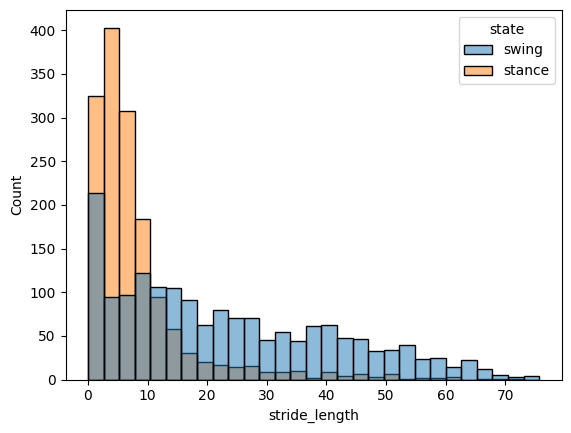

In [503]:
episode_df.dropna()

sns.histplot(data=episode_df, x='stride_length', hue='state')

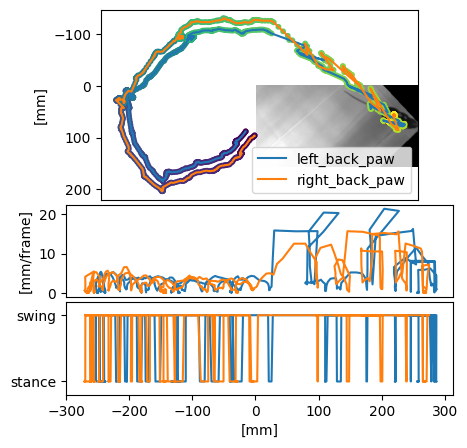

In [285]:
start = 31000
duration = 1000
end = start + duration
bodyparts = ['left_back_paw', 'right_back_paw' ]
keypoints = transformer.apply(video_analysis.keypoints)
reader = VideoReader(video_analysis.video, transforms=[transformer])
visualize_step_by_distance(
    reader, keypoints, bodyparts, start, duration, marker_size=10, threshold=2)

plt.savefig('gait-step_2023-03-27.png')

In [ ]:
## 